# ResNet

In [1]:
from tensorflow import keras
from keras.applications.resnet50 import ResNet50, decode_predictions
resnet = ResNet50()
resnet.summary()

Using TensorFlow backend.


102858752/102853048 [==============================] - 31s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_______________________

bn4b_branch2a (BatchNormalizati (None, 14, 14, 256)  1024        res4b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_26 (Activation)      (None, 14, 14, 256)  0           bn4b_branch2a[0][0]              
__________________________________________________________________________________________________
res4b_branch2b (Conv2D)         (None, 14, 14, 256)  590080      activation_26[0][0]              
__________________________________________________________________________________________________
bn4b_branch2b (BatchNormalizati (None, 14, 14, 256)  1024        res4b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_27 (Activation)      (None, 14, 14, 256)  0           bn4b_branch2b[0][0]              
__________________________________________________________________________________________________
res4b_bran

In [20]:
import cv2
import time 

img = cv2.imread('images/bird6.jpg', -1)
img = cv2.resize(img, (224, 224))

start = time.time() 
yhat = resnet.predict(img.reshape(-1, 224, 224, 3))
time = time.time() - start
label = decode_predictions(yhat)
label = label[0][0]

테스트 시 소요 시간 : 0.07681441307067871
drake (96.18%)


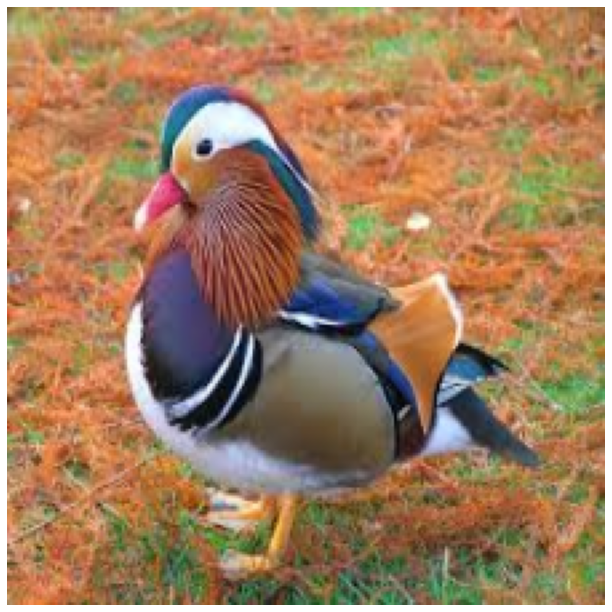

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

print("테스트 시 소요 시간 : {}".format(time))
print('%s (%.2f%%)' % (label[1], label[2]*100))
img = img[:,:,::-1]
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.show()